In [1]:
%matplotlib notebook
import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split
from random import randint
import pandas as pd
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import RMSprop
import tensorflow_addons as tfa
from tensorflow.python.client import device_lib
import tensorflow as tf
import os
import time
import setproctitle as SP
import numpy as np
from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"

import matplotlib.pyplot as plt

import math
import pandas
#import keras
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, Input, Flatten, Dense, BatchNormalization, ReLU, Dropout, MaxPooling1D, GlobalAveragePooling1D
from numpy import savetxt
from tensorflow.keras.losses import Huber, MeanSquaredError, huber
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow import keras
import tensorflow.keras.losses
from numpy import linalg as LA
import seaborn as sns
# from keras.regularizers import l2
# from keras import backend as K
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch,Sklearn,BayesianOptimization,Hyperband
from tensorflow.keras import layers, models
from keras_tuner.engine.hyperparameters import HyperParameters
from hyperopt import hp
from tensorflow.keras.layers import Lambda


import matplotlib
from matplotlib import font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_dirs = ["/Times_New_Roman"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
custom_font_manager = font_manager.FontManager()
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# result = font_manager.fontManager.findfont('Times New Roman')
# print(result)
plt.rcParams["font.family"] = "Times New Roman"

font = {'size'   : 16}
matplotlib.rc('font', **font)
import scipy.io


In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.1)

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))


In [3]:
def Tip_RMSE(y_test_GT,y_test_pred_F,marker):
    [n_ts,m_ts,l]=y_test_GT.shape

    TipError=np.zeros((n_ts))
    RMSE=np.zeros((n_ts))
    EuclideanDistance=np.zeros((n_ts,15))

    for i in range (0,n_ts):
        M1=y_test_GT[i,0,:];
        M2=y_test_GT[i,1,:];
        M3=y_test_GT[i,2,:];
        M4=y_test_GT[i,3,:];
        M5=y_test_GT[i,4,:];
        M6=y_test_GT[i,5,:];
        M7=y_test_GT[i,6,:];
        M8=y_test_GT[i,7,:];
        M9=y_test_GT[i,8,:];
        M10=y_test_GT[i,9,:];
        M11=y_test_GT[i,10,:];
        M12=y_test_GT[i,11,:];
        M13=y_test_GT[i,12,:];
        M14=y_test_GT[i,13,:];
        M15=y_test_GT[i,14,:];
    # 
        MP1=y_test_pred_F[i,0,:];
        MP2=y_test_pred_F[i,1,:];
        MP3=y_test_pred_F[i,2,:];
        MP4=y_test_pred_F[i,3,:];
        MP5=y_test_pred_F[i,4,:];
        MP6=y_test_pred_F[i,5,:];
        MP7=y_test_pred_F[i,6,:];
        MP8=y_test_pred_F[i,7,:];
        MP9=y_test_pred_F[i,8,:];
        MP10=y_test_pred_F[i,9,:];
        MP11=y_test_pred_F[i,10,:];
        MP12=y_test_pred_F[i,11,:];
        MP13=y_test_pred_F[i,12,:];
        MP14=y_test_pred_F[i,13,:];
        MP15=y_test_pred_F[i,14,:];

    #     
        EuclideanDistance[i,:]=[LA.norm(MP1-M1),LA.norm(MP2-M2),LA.norm(MP3-M3),LA.norm(MP4-M4),LA.norm(MP5-M5),LA.norm(MP6-M6)
                                  ,LA.norm(MP7-M7),LA.norm(MP8-M8),LA.norm(MP9-M9),LA.norm(MP10-M10),LA.norm(MP11-M11)
                                  ,LA.norm(MP12-M12),LA.norm(MP13-M13),LA.norm(MP14-M14),LA.norm(MP15-M15)];
    
        TipError[i]=EuclideanDistance[i,marker]
        RMSE[i]=tf.sqrt(tf.math.reduce_mean(tf.square(EuclideanDistance[i,0:marker+1])))
    inq_TE=np.quantile(TipError,[0.25, 0.75])
    upper_bound_TE = inq_TE[1]+(1.5*(inq_TE[1]-inq_TE[0]))
    lower_bound_TE = inq_TE[0]-(1.5*(inq_TE[1]-inq_TE[0]))
    Outliers_TE=TipError[(TipError <= lower_bound_TE) | (TipError >= upper_bound_TE)]
    
    inq_RMSE=np.quantile(RMSE,[0.25, 0.75])
    upper_bound_RMSE = inq_RMSE[1]+(1.5*(inq_RMSE[1]-inq_RMSE[0]))
    lower_bound_RMSE = inq_RMSE[0]-(1.5*(inq_RMSE[1]-inq_RMSE[0]))
    Outliers_RMSE=RMSE[(RMSE <= lower_bound_RMSE) | (RMSE >= upper_bound_RMSE)]
    

    print([np.mean(TipError),np.std(TipError)],'Tip Error_Mean_STD')
    print([np.median(TipError),inq_TE[1]-inq_TE[0],len(Outliers_TE)],'Tip Error_Median_IQR_Outliers')
    print([np.mean(RMSE),np.std(RMSE)],'RMSE_Mean_STD')
    print([np.median(RMSE),inq_RMSE[1]-inq_RMSE[0],len(Outliers_RMSE)],'RMSE_Median_IQR_Outliers')
    
        
#     print([tf.math.reduce_mean(TipError),tf.math.reduce_mean(RMSE)])
    green_diamond = dict(marker='D',markeredgecolor='0.7', markersize=3)#markerfacecolor=None, , alpha=0.6
    medianprops = dict(linewidth=1.5)
    
#     plt.figure(figsize=(3,4))
#     plt.boxplot([TipError,RMSE],labels=['Tip Error','RMSE'],flierprops=green_diamond,medianprops=medianprops)
#     plt.ylabel('Error [mm]')
#     plt.grid(b=True, which='both', axis='both', color='0.95')
#     plt.ylim(top=100,bottom=-1)
#     plt.tight_layout()


    plt.figure(figsize=(8,4))
    plt.boxplot(EuclideanDistance[:,:],flierprops=green_diamond,medianprops=medianprops)
#     plt.ylim(top=100,bottom=-1)
    plt.ylabel('Error [mm]')
    plt.xlabel('Marker')
    plt.grid(b=True, which='both', axis='both', color='0.95')
    plt.tight_layout()
#     plt.savefig('EUC.svg',format='svg')

def DataLoader(path):
    with open('label.txt') as f:
        contents = f.read()
    label=np.fromstring(contents, dtype=float, sep=' ')
    label=np.reshape(label,(-1,60))
    # print(label.shape)
    f.close()

    with open('output.txt') as f:
        contents = f.read()
    output=np.fromstring(contents, dtype=float, sep=' ')
    output=np.reshape(output,(-1,60))
    # print(output.shape)
    f.close()

    pred_Relative=output
    pred_Absolute = np.zeros((len(pred_Relative),60)) 
    for i in range(0,len(pred_Relative)):
        pred_Absolute[i,0:3]=pred_Relative[i,0:3]
        for j in range(1,20):
                pred_Absolute[i,3*j]=pred_Absolute[i,3*j-3]+pred_Relative[i,3*j]
                pred_Absolute[i,3*j+1]=pred_Absolute[i,3*j-2]+pred_Relative[i,3*j+1]
                pred_Absolute[i,3*j+2]=pred_Absolute[i,3*j-1]+pred_Relative[i,3*j+2]

    return label,pred_Absolute
    
# def EvaluatingGrad_k(path,k1,k2,marker):
#     with open('label.txt') as f:
#         contents = f.read()
#     label=np.fromstring(contents, dtype=float, sep=' ')
#     label=np.reshape(label,(-1,60))
#     # print(label.shape)
#     f.close()

#     with open('output.txt') as f:
#         contents = f.read()
#     output=np.fromstring(contents, dtype=float, sep=' ')
#     output=np.reshape(output,(-1,60))
#     # print(output.shape)
#     f.close()

#     pred_Relative=output
#     pred_Absolute = np.zeros((len(pred_Relative),60)) 
#     for i in range(0,len(pred_Relative)):
#         pred_Absolute[i,0:3]=pred_Relative[i,0:3]
#         for j in range(1,20):
#                 pred_Absolute[i,3*j]=pred_Absolute[i,3*j-3]+pred_Relative[i,3*j]
#                 pred_Absolute[i,3*j+1]=pred_Absolute[i,3*j-2]+pred_Relative[i,3*j+1]
#                 pred_Absolute[i,3*j+2]=pred_Absolute[i,3*j-1]+pred_Relative[i,3*j+2]

#     Tip_RMSE(label[k1:k2,:],pred_Absolute[k1:k2,:],marker)
#     return label[k1:k2,:],pred_Absolute[k1:k2,:]
def plotting3D(a,b,label,pred_Absolute):

    Col=['#1b9e77','#d95f02','#7570b3']
#     j=randint(0,label.shape[0])

    for i in range (a,b):
        xyz=label[i,:].reshape((20,3))
        xyzP=pred_Absolute[i,:].reshape((20,3))
        ax.clear()
        ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], color=Col[0], linewidth=1 ,marker='o',markersize=3,linestyle='None',alpha=0.7)
        ax.plot(xyzP[:,0], xyzP[:,1], xyzP[:,2], color=Col[1], linewidth=1.5)#,marker='o',markersize=5)

        null = np.zeros(len(xyz[:,0]))

        offsetX=-300
        offsetY=-350
        offsetZ=-300
        alpha=0.2
        col=Col[0]
        ax.plot(xyz[:,0], xyz[:,1],null+offsetZ,color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)
        ax.plot(xyz[:,0],null, xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)#-offsetY
        ax.plot(null+offsetX,xyz[:,1], xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)

        colP=Col[1]
        ax.plot(xyzP[:,0], xyzP[:,1],null+offsetZ,color=colP,alpha=alpha)
        # ax.plot(xyzP[:,0],null+offsetY, xyzP[:,2],color=colP)
        ax.plot(null+offsetX,xyzP[:,1], xyzP[:,2],color=colP,alpha=alpha)

        ax.axes.set_xlim3d(left=offsetX, right=300) 
        ax.axes.set_ylim3d(bottom=offsetY, top=0) 
        ax.axes.set_zlim3d(bottom=offsetZ, top=300)

        ax.locator_params(axis='x', nbins=6)
        ax.locator_params(axis='y', nbins=6)
        ax.locator_params(axis='z', nbins=6)

        ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
        ax.set_ylabel('Y [mm]')
        ax.set_zlabel('Z [mm]')
    #     ax.view_init(elev=20., azim=60)
    #     ax.legend(['Real Shape','Sensing plane','Predicted Shape'], loc='upper left')

    #     plt.pause(0.001)
        fig.canvas.draw()
    #     # save figure with different names depend on the view
    #     filename='3d_vis_FBGlocations'+str(i)+'.png'
    #     plt.savefig(filename, dpi=300)

In [4]:
path=os.chdir("/evaluation/PytorchTraining/RandomTest_1606")
label_random,pred_Absolute_random=DataLoader(path)
path=os.chdir("/evaluation/PytorchTraining/1606_3min_first") 
label_1,pred_Absolute_1=DataLoader(path)#,2200,5400
path=os.chdir("/evaluation/PytorchTraining/1606_3min_second")
label_2,pred_Absolute_2=DataLoader(path)#,2700,5306
label_t=np.concatenate((label_1,label_2), axis=0)
print(label_t.shape)
# pred_Absolute_t=np.concatenate((pred_Absolute_1,pred_Absolute_2), axis=0)
# # print(pred_Absolute_t.shape)
# Tip_RMSE(label_t,pred_Absolute_t,marker-1)

(11619, 60)


In [5]:
os.chdir("/data/MFD_data/")


SpatialCoordinate_GT_Random=scipy.io.loadmat('SpatialCoordinate_GT_TestResults_10_05_RandomTest_all22-06-2022.mat')
SpatialCoordinate_pred_Random=scipy.io.loadmat('SpatialCoordinate_pred_TestResults_10_05_RandomTest_all22-06-2022.mat')

SpatialCoordinate_GT_3min_first=scipy.io.loadmat('SpatialCoordinate_GT_TestResults_10_05_3min_first_all22-06-2022.mat')
SpatialCoordinate_pred_3min_first=scipy.io.loadmat('SpatialCoordinate_pred_TestResults_10_05_3min_first_all22-06-2022.mat')

SpatialCoordinate_GT_3min_second=scipy.io.loadmat('SpatialCoordinate_GT_TestResults_10_05_3min_second_all22-06-2022.mat')
SpatialCoordinate_pred_3min_second=scipy.io.loadmat('SpatialCoordinate_pred_TestResults_10_05_3min_second_all22-06-2022.mat')

ArcNum_5FBGs_raw=scipy.io.loadmat('ArcNum_5FBGs.mat')
ArcNum_F_raw=scipy.io.loadmat('ArcNum_F.mat')
Rotation_Matrix_raw=scipy.io.loadmat('Transformation_Matrix.mat')


In [6]:
ArcNum_5FBGs=np.squeeze(np. array(list(ArcNum_5FBGs_raw. items()))[3,1],0)
ArcNum_F=np.squeeze(np. array(list(ArcNum_F_raw. items()))[3,1],0)
Rotation_Matrix=np. array(list(Rotation_Matrix_raw. items()))[3,1]

SpatialCoordinate_GT_Random_F = np. array(list(SpatialCoordinate_GT_Random. items()))[3,1].transpose(2,1,0)
print(SpatialCoordinate_GT_Random_F.shape)
SpatialCoordinate_pred_Random_F = np. array(list(SpatialCoordinate_pred_Random. items()))[3,1].transpose(2,1,0)
print(SpatialCoordinate_pred_Random_F.shape)

SpatialCoordinate_GT_3min_first_F = np. array(list(SpatialCoordinate_GT_3min_first. items()))[3,1].transpose(2,1,0)
print(SpatialCoordinate_GT_3min_first_F.shape)
SpatialCoordinate_pred_3min_first_F = np. array(list(SpatialCoordinate_pred_3min_first. items()))[3,1].transpose(2,1,0)
print(SpatialCoordinate_pred_3min_first_F.shape)

SpatialCoordinate_GT_3min_second_F = np. array(list(SpatialCoordinate_GT_3min_second. items()))[3,1].transpose(2,1,0)
print(SpatialCoordinate_GT_3min_second_F.shape)
SpatialCoordinate_pred_3min_second_F = np. array(list(SpatialCoordinate_pred_3min_second. items()))[3,1].transpose(2,1,0)
print(SpatialCoordinate_pred_3min_second_F.shape)


(5806, 3051, 3)
(5806, 2474, 3)
(5812, 3061, 3)
(5812, 2479, 3)
(5807, 3058, 3)
(5807, 2478, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify '

<IPython.core.display.Javascript object>


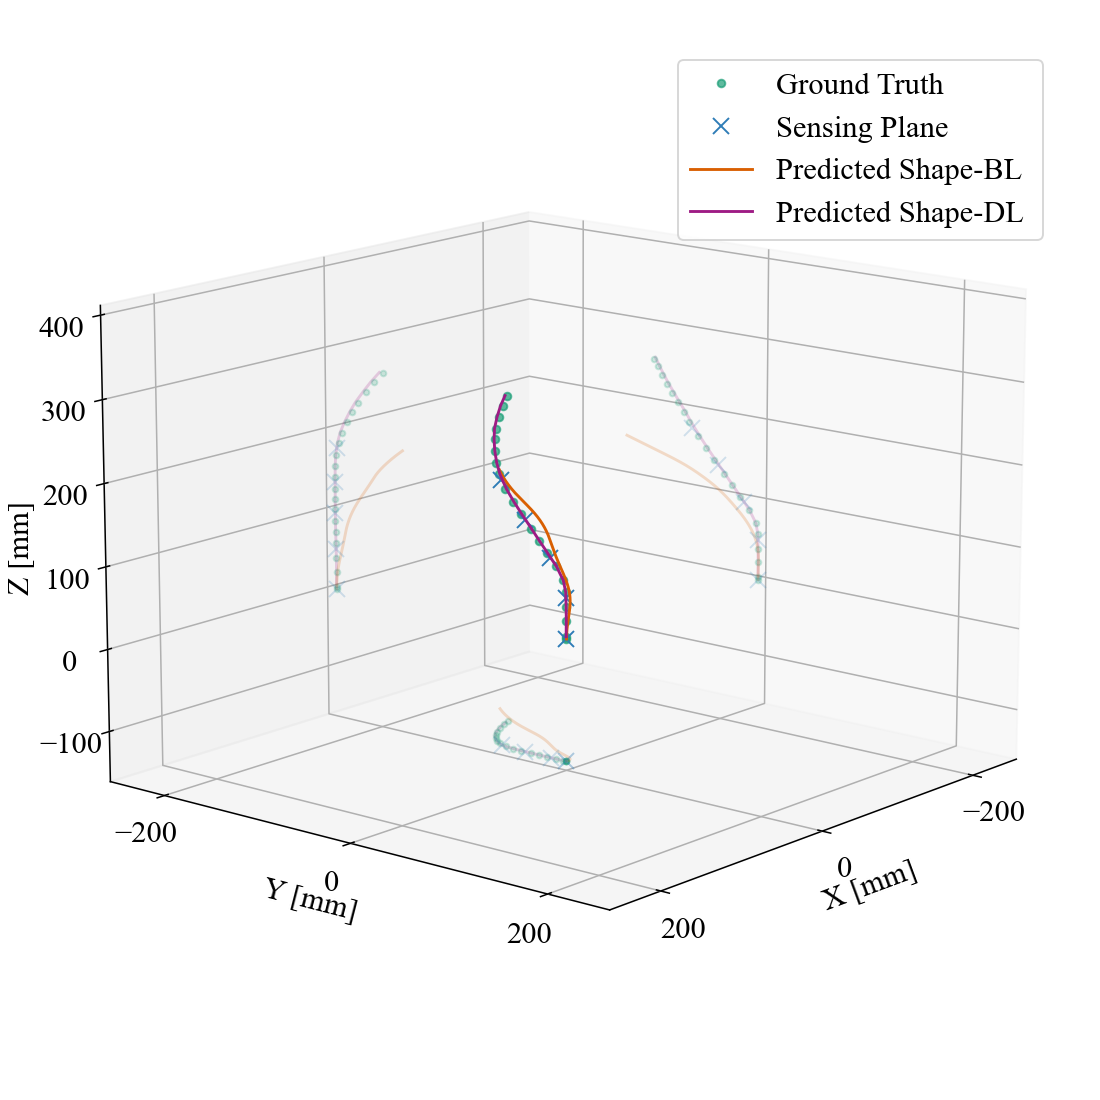

In [7]:
fig = plt.figure(figsize=(8,8))

ax= fig.gca(projection='3d')
# plt.ion()
fig.show()

In [15]:
Col=['#1b9e77','#d95f02','#7570b3','#9e1b84','#a6611a','#d01c8b','#2c7bb6']
#Dataset Test1
N1=100
NN=200
N2=N1+NN
RM=Rotation_Matrix[0:3,0:3]
y_GT=SpatialCoordinate_GT_Random_F[:,:,:]
y_pred=SpatialCoordinate_pred_Random_F[:,:,:]


for i in range (N1,N2):
    pred_Absolute_random_Transformed=np.dot(RM,(pred_Absolute_random[i,:].reshape((20,3))).transpose(1,0))
#     print(pred_Absolute_random_Transformed)
    xyz=y_GT[i,ArcNum_F[0:22],:]
    xyzP=y_pred[i,:,:]#ArcNum_F[0:17]
    FBG=y_GT[i,ArcNum_5FBGs,:]
    ax.clear()
    
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], color=Col[0], linewidth=1 ,marker='o',markersize=4,linestyle='None',alpha=0.7)
    ax.plot(FBG[:,0], FBG[:,1], FBG[:,2], color=Col[6] ,marker="x", linewidth=1,markersize=8,linestyle='None',alpha=0.99)#matplotlib.markers.CARETDOWN
    ax.plot(xyzP[:,0], xyzP[:,1], xyzP[:,2], color=Col[1], linewidth=1.5)#,marker='o',markersize=5)
    ax.plot(pred_Absolute_random_Transformed[0,:], pred_Absolute_random_Transformed[1,:], pred_Absolute_random_Transformed[2,:], color=Col[3], linewidth=1.5)
    
    null_P = np.zeros(len(xyzP[:,0]))
    null = np.zeros(len(xyz[:,0]))
    null_A = np.zeros(len(pred_Absolute_random_Transformed[0,:]))


    offsetX=-250
    offsetY=-250
    offsetZ=-150
    alpha=0.2
    
    colA=Col[3]
    ax.plot(pred_Absolute_random_Transformed[0,:], pred_Absolute_random_Transformed[1,:],null_A+offsetZ,color=colA,alpha=alpha)
    ax.plot(pred_Absolute_random_Transformed[0,:],null_A+offsetY, pred_Absolute_random_Transformed[2,:],color=colA,alpha=alpha)
    ax.plot(null_A+offsetX,pred_Absolute_random_Transformed[1,:], pred_Absolute_random_Transformed[2,:],color=colA,alpha=alpha)
    
    col=Col[0]
    ax.plot(xyz[:,0], xyz[:,1],null+offsetZ,color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)
    ax.plot(xyz[:,0],null+offsetY, xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)
    ax.plot(null+offsetX,xyz[:,1], xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)

    colP=Col[1]
    ax.plot(xyzP[:,0], xyzP[:,1],null_P+offsetZ,color=colP,alpha=alpha)
    ax.plot(xyzP[:,0],null_P+offsetY, xyzP[:,2],color=colP,alpha=alpha)
    ax.plot(null_P+offsetX,xyzP[:,1], xyzP[:,2],color=colP,alpha=alpha)

    col=Col[6]
    ax.plot(FBG[:,0], FBG[:,1],np.zeros(len(FBG[:,0]))+offsetZ,color=col,linestyle='None',marker='x',alpha=alpha,markersize=8)
    ax.plot(FBG[:,0],np.zeros(len(FBG[:,0]))+offsetY, FBG[:,2],color=col,linestyle='None',marker='x',alpha=alpha,markersize=8)
    ax.plot(np.zeros(len(FBG[:,0]))+offsetX,FBG[:,1], FBG[:,2],color=col,linestyle='None',marker='x',alpha=alpha,markersize=8)
# |

    ax.axes.set_xlim3d(left=offsetX, right=250) 
    ax.axes.set_ylim3d(bottom=offsetY, top=250) 
    ax.axes.set_zlim3d(bottom=offsetZ, top=400)
    
    ax.locator_params(axis='x', nbins=4)
    ax.locator_params(axis='y', nbins=4)
    ax.locator_params(axis='z', nbins=6)
    
#     ax.axes.set_xlim3d(left=200, right=600) 
#     ax.axes.set_ylim3d(bottom=50, top=500) 
#     ax.axes.set_zlim3d(bottom=-100, top=300)
    ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
    ax.set_ylabel('Y [mm]')
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel('Z [mm]', rotation=90)
    ax.view_init(elev=14., azim=40)
    ax.legend(['Ground Truth','Sensing Plane','Predicted Shape-MFD','Predicted Shape-DL '], loc='best')

#     plt.pause(0.001)
    fig.canvas.draw()
#     plt.tight_layout
    
#     save figure with different names depend on the view
#     filename='ClassicalApproach_TestResults_5_Schade'+str(i)+'.png'
#     plt.savefig(filename, dpi=300)

#     plt.grid(b=True, which='both', axis='both', color='0.95')
#     plt.tight_layout()
    os.chdir("/evaluation/3DshapeExamples/video/Random")
    filename='Random_'+str(i)+'.png'
    plt.savefig(filename, dpi=300)

<IPython.core.display.Javascript object>


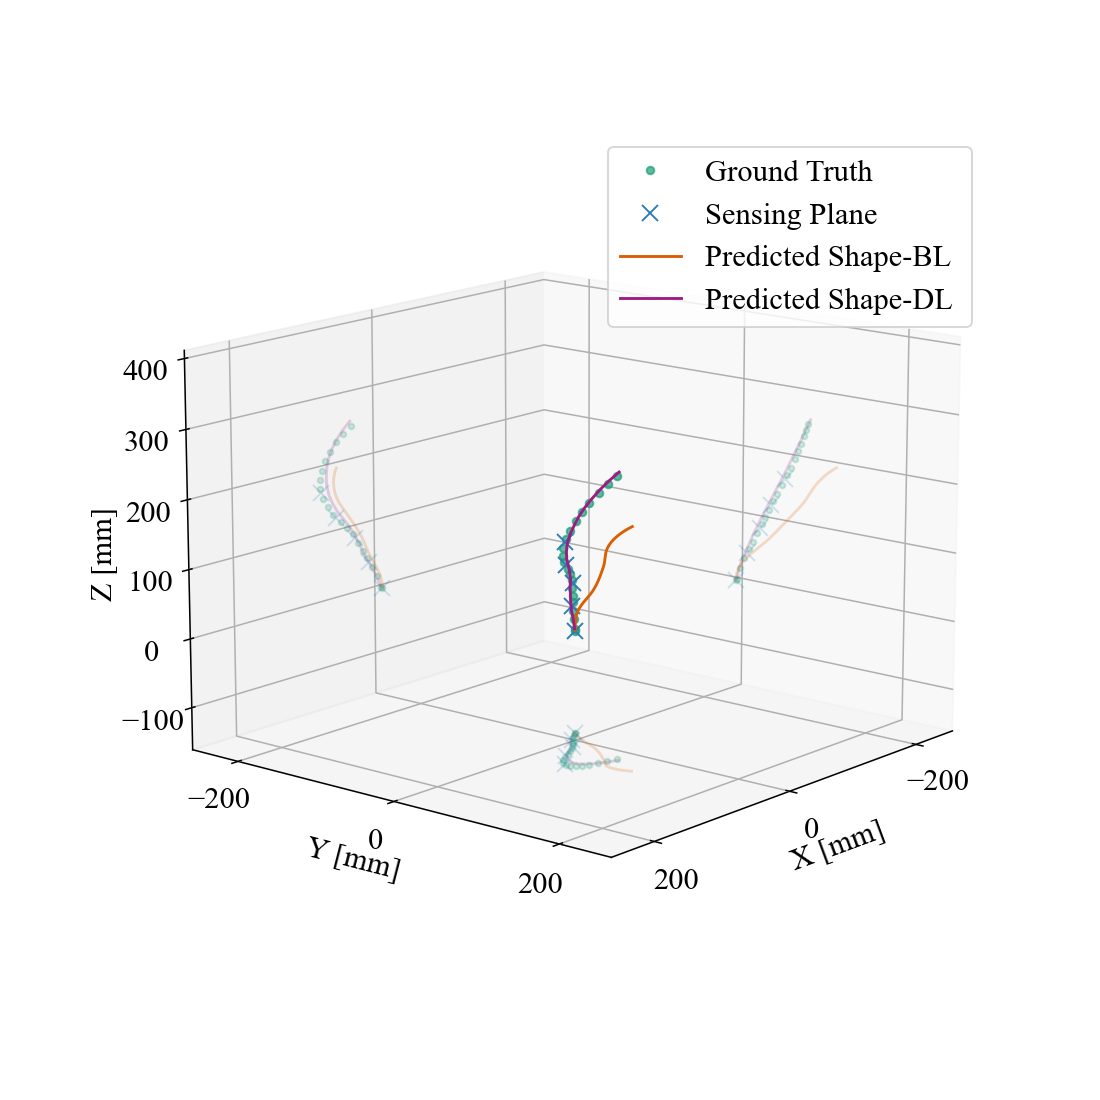

In [7]:
fig = plt.figure(figsize=(8,8))

ax= fig.gca(projection='3d')
# plt.ion()
fig.show()

In [9]:
Col=['#1b9e77','#d95f02','#7570b3','#9e1b84','#a6611a','#d01c8b','#2c7bb6']
#Dataset Test2
N1=3800 #1[530,2070]#2[770,1910]#3[1110,1710]#4[1320,1560] #3min_1 2200:5400 #3min_2 2700:5306
NN=200
print(N1)
N2=N1+NN
RM=Rotation_Matrix[0:3,0:3]
y_GT=SpatialCoordinate_GT_3min_first_F[:,:,:]
y_pred=SpatialCoordinate_pred_3min_first_F[:,:,:]


for i in range (N1,N2):
#     label_random_Transformed=np.dot(RM,(label_random[i,:].reshape((20,3))[0:16,:]).transpose(1,0))
    pred_Absolute_random_Transformed=np.dot(RM,(pred_Absolute_1[i,:].reshape((20,3))).transpose(1,0))
#     print(pred_Absolute_random_Transformed)
    xyz=y_GT[i,ArcNum_F[0:22],:]
    xyzP=y_pred[i,:,:]#ArcNum_F[0:17]
    FBG=y_GT[i,ArcNum_5FBGs,:]
    ax.clear()
    
#     ax.plot(label_random_Transformed[0,:], label_random_Transformed[1,:], label_random_Transformed[2,:], color=Col[3], linewidth=1 ,marker='o',markersize=3,linestyle='None',alpha=0.7)

    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], color=Col[0], linewidth=1 ,marker='o',markersize=4,linestyle='None',alpha=0.7)
    ax.plot(FBG[:,0], FBG[:,1], FBG[:,2], color=Col[6] ,marker="x", linewidth=1,markersize=8,linestyle='None',alpha=0.99)#matplotlib.markers.CARETDOWN
    ax.plot(xyzP[:,0], xyzP[:,1], xyzP[:,2], color=Col[1], linewidth=1.5)#,marker='o',markersize=5)
    ax.plot(pred_Absolute_random_Transformed[0,:], pred_Absolute_random_Transformed[1,:], pred_Absolute_random_Transformed[2,:], color=Col[3], linewidth=1.5)
    
    null_P = np.zeros(len(xyzP[:,0]))
    null = np.zeros(len(xyz[:,0]))
    null_A = np.zeros(len(pred_Absolute_random_Transformed[0,:]))


    offsetX=-250
    offsetY=-250
    offsetZ=-150
    alpha=0.2
    
    colA=Col[3]
    ax.plot(pred_Absolute_random_Transformed[0,:], pred_Absolute_random_Transformed[1,:],null_A+offsetZ,color=colA,alpha=alpha)
    ax.plot(pred_Absolute_random_Transformed[0,:],null_A+offsetY, pred_Absolute_random_Transformed[2,:],color=colA,alpha=alpha)
    ax.plot(null_A+offsetX,pred_Absolute_random_Transformed[1,:], pred_Absolute_random_Transformed[2,:],color=colA,alpha=alpha)
    
    col=Col[0]
    ax.plot(xyz[:,0], xyz[:,1],null+offsetZ,color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)
    ax.plot(xyz[:,0],null+offsetY, xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)
    ax.plot(null+offsetX,xyz[:,1], xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)

    colP=Col[1]
    ax.plot(xyzP[:,0], xyzP[:,1],null_P+offsetZ,color=colP,alpha=alpha)
    ax.plot(xyzP[:,0],null_P+offsetY, xyzP[:,2],color=colP,alpha=alpha)
    ax.plot(null_P+offsetX,xyzP[:,1], xyzP[:,2],color=colP,alpha=alpha)

    col=Col[6]
    ax.plot(FBG[:,0], FBG[:,1],np.zeros(len(FBG[:,0]))+offsetZ,color=col,linestyle='None',marker='x',alpha=alpha,markersize=8)
    ax.plot(FBG[:,0],np.zeros(len(FBG[:,0]))+offsetY, FBG[:,2],color=col,linestyle='None',marker='x',alpha=alpha,markersize=8)
    ax.plot(np.zeros(len(FBG[:,0]))+offsetX,FBG[:,1], FBG[:,2],color=col,linestyle='None',marker='x',alpha=alpha,markersize=8)
# |

    ax.axes.set_xlim3d(left=offsetX, right=250) 
    ax.axes.set_ylim3d(bottom=offsetY, top=250) 
    ax.axes.set_zlim3d(bottom=offsetZ, top=400)
    
    ax.locator_params(axis='x', nbins=4)
    ax.locator_params(axis='y', nbins=4)
    ax.locator_params(axis='z', nbins=6)
    
#     ax.axes.set_xlim3d(left=200, right=600) 
#     ax.axes.set_ylim3d(bottom=50, top=500) 
#     ax.axes.set_zlim3d(bottom=-100, top=300)
    ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
    ax.set_ylabel('Y [mm]')
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel('Z [mm]', rotation=90)
    ax.view_init(elev=14., azim=40)
    ax.legend(['Ground Truth','Sensing Plane','Predicted Shape-MFD','Predicted Shape-DL '], loc='best')

#     plt.pause(0.001)
    fig.canvas.draw()

    os.chdir("/evaluation/3DshapeExamples/video/3min")
    filename='3minFirst_'+str(i)+'.png'
    plt.savefig(filename, dpi=300)

3800


<IPython.core.display.Javascript object>


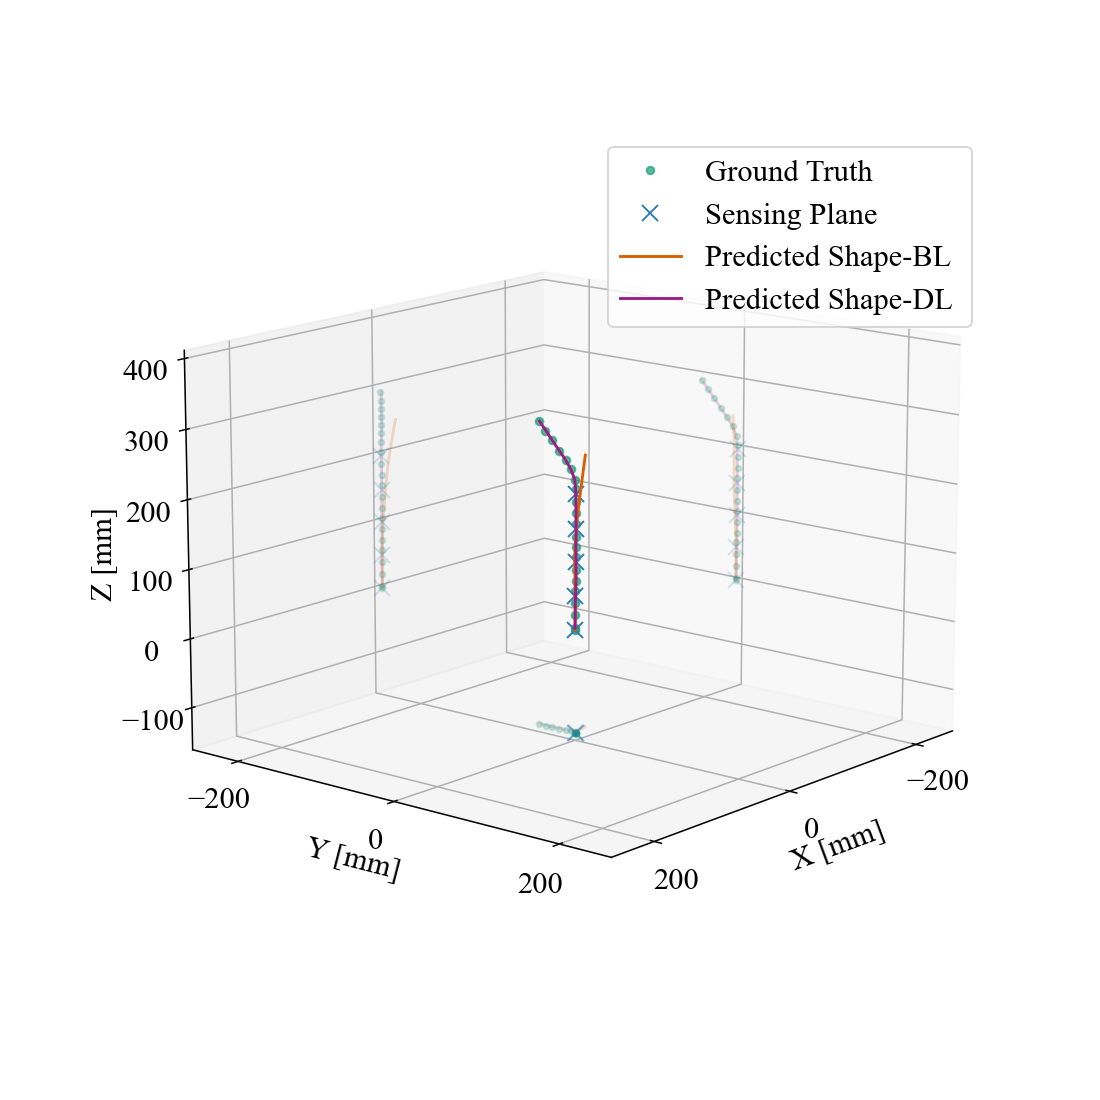

In [26]:
fig = plt.figure(figsize=(8,8))

ax= fig.gca(projection='3d')
# plt.ion()
fig.show()

In [27]:
Col=['#1b9e77','#d95f02','#7570b3','#9e1b84','#a6611a','#d01c8b','#2c7bb6']
#dataset Test3
SelectedSamples=np.array([530,2070,770,1910,1110,1710,1320,1560])

RM=Rotation_Matrix[0:3,0:3]
y_GT=SpatialCoordinate_GT_3min_first_F[:,:,:]
y_pred=SpatialCoordinate_pred_3min_first_F[:,:,:]
for k in range(0,8):
    for j in range(0,10):
        i=SelectedSamples[k]-5+j
#         print(i)

        pred_Absolute_random_Transformed=np.dot(RM,(pred_Absolute_1[i,:].reshape((20,3))).transpose(1,0))
        xyz=y_GT[i,ArcNum_F[0:22],:]
        xyzP=y_pred[i,:,:]#ArcNum_F[0:17]
        FBG=y_GT[i,ArcNum_5FBGs,:]
        ax.clear()

        ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], color=Col[0], linewidth=1 ,marker='o',markersize=4,linestyle='None',alpha=0.7)
        ax.plot(FBG[:,0], FBG[:,1], FBG[:,2], color=Col[6] ,marker="x", linewidth=1,markersize=8,linestyle='None',alpha=0.99)#matplotlib.markers.CARETDOWN
        ax.plot(xyzP[:,0], xyzP[:,1], xyzP[:,2], color=Col[1], linewidth=1.5)#,marker='o',markersize=5)
        ax.plot(pred_Absolute_random_Transformed[0,:], pred_Absolute_random_Transformed[1,:], pred_Absolute_random_Transformed[2,:], color=Col[3], linewidth=1.5)

        null_P = np.zeros(len(xyzP[:,0]))
        null = np.zeros(len(xyz[:,0]))
        null_A = np.zeros(len(pred_Absolute_random_Transformed[0,:]))


        offsetX=-250
        offsetY=-250
        offsetZ=-150
        alpha=0.2

        colA=Col[3]
        ax.plot(pred_Absolute_random_Transformed[0,:], pred_Absolute_random_Transformed[1,:],null_A+offsetZ,color=colA,alpha=alpha)
        ax.plot(pred_Absolute_random_Transformed[0,:],null_A+offsetY, pred_Absolute_random_Transformed[2,:],color=colA,alpha=alpha)
        ax.plot(null_A+offsetX,pred_Absolute_random_Transformed[1,:], pred_Absolute_random_Transformed[2,:],color=colA,alpha=alpha)

        col=Col[0]
        ax.plot(xyz[:,0], xyz[:,1],null+offsetZ,color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)
        ax.plot(xyz[:,0],null+offsetY, xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)
        ax.plot(null+offsetX,xyz[:,1], xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)

        colP=Col[1]
        ax.plot(xyzP[:,0], xyzP[:,1],null_P+offsetZ,color=colP,alpha=alpha)
        ax.plot(xyzP[:,0],null_P+offsetY, xyzP[:,2],color=colP,alpha=alpha)
        ax.plot(null_P+offsetX,xyzP[:,1], xyzP[:,2],color=colP,alpha=alpha)

        col=Col[6]
        ax.plot(FBG[:,0], FBG[:,1],np.zeros(len(FBG[:,0]))+offsetZ,color=col,linestyle='None',marker='x',alpha=alpha,markersize=8)
        ax.plot(FBG[:,0],np.zeros(len(FBG[:,0]))+offsetY, FBG[:,2],color=col,linestyle='None',marker='x',alpha=alpha,markersize=8)
        ax.plot(np.zeros(len(FBG[:,0]))+offsetX,FBG[:,1], FBG[:,2],color=col,linestyle='None',marker='x',alpha=alpha,markersize=8)
    # |

        ax.axes.set_xlim3d(left=offsetX, right=250) 
        ax.axes.set_ylim3d(bottom=offsetY, top=250) 
        ax.axes.set_zlim3d(bottom=offsetZ, top=400)

        ax.locator_params(axis='x', nbins=4)
        ax.locator_params(axis='y', nbins=4)
        ax.locator_params(axis='z', nbins=6)

    #     ax.axes.set_xlim3d(left=200, right=600) 
    #     ax.axes.set_ylim3d(bottom=50, top=500) 
    #     ax.axes.set_zlim3d(bottom=-100, top=300)
        ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
        ax.set_ylabel('Y [mm]')
        ax.zaxis.set_rotate_label(False)
        ax.set_zlabel('Z [mm]', rotation=90)
        ax.view_init(elev=14., azim=40)
        ax.legend(['Ground Truth','Sensing Plane','Predicted Shape-BL','Predicted Shape-DL '], loc='best')

    #     plt.pause(0.001)
        fig.canvas.draw()

        os.chdir("/evaluation/3DshapeExamples/video/template")
        filename='Template_'+str(i)+'.png'
        plt.savefig(filename, dpi=300)

525
526
527
528
529
530
531
532
533
534
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
765
766
767
768
769
770
771
772
773
774
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564


<IPython.core.display.Javascript object>


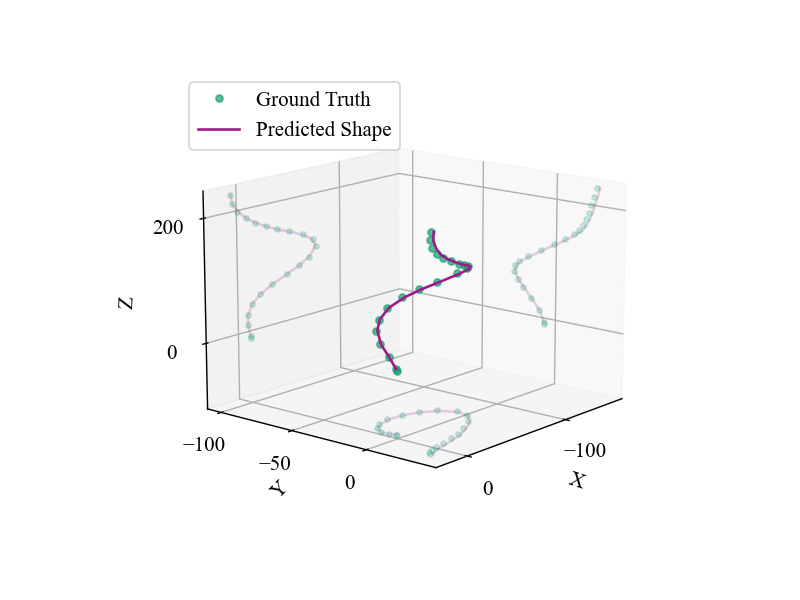

In [4]:
fig = plt.figure()

ax= fig.gca(projection='3d')
plt.ion()
fig.show()
c=1320
step=5
a=c-step
b=c+step
plotting3D(a,b,label_random,pred_Absolute_random)

<IPython.core.display.Javascript object>


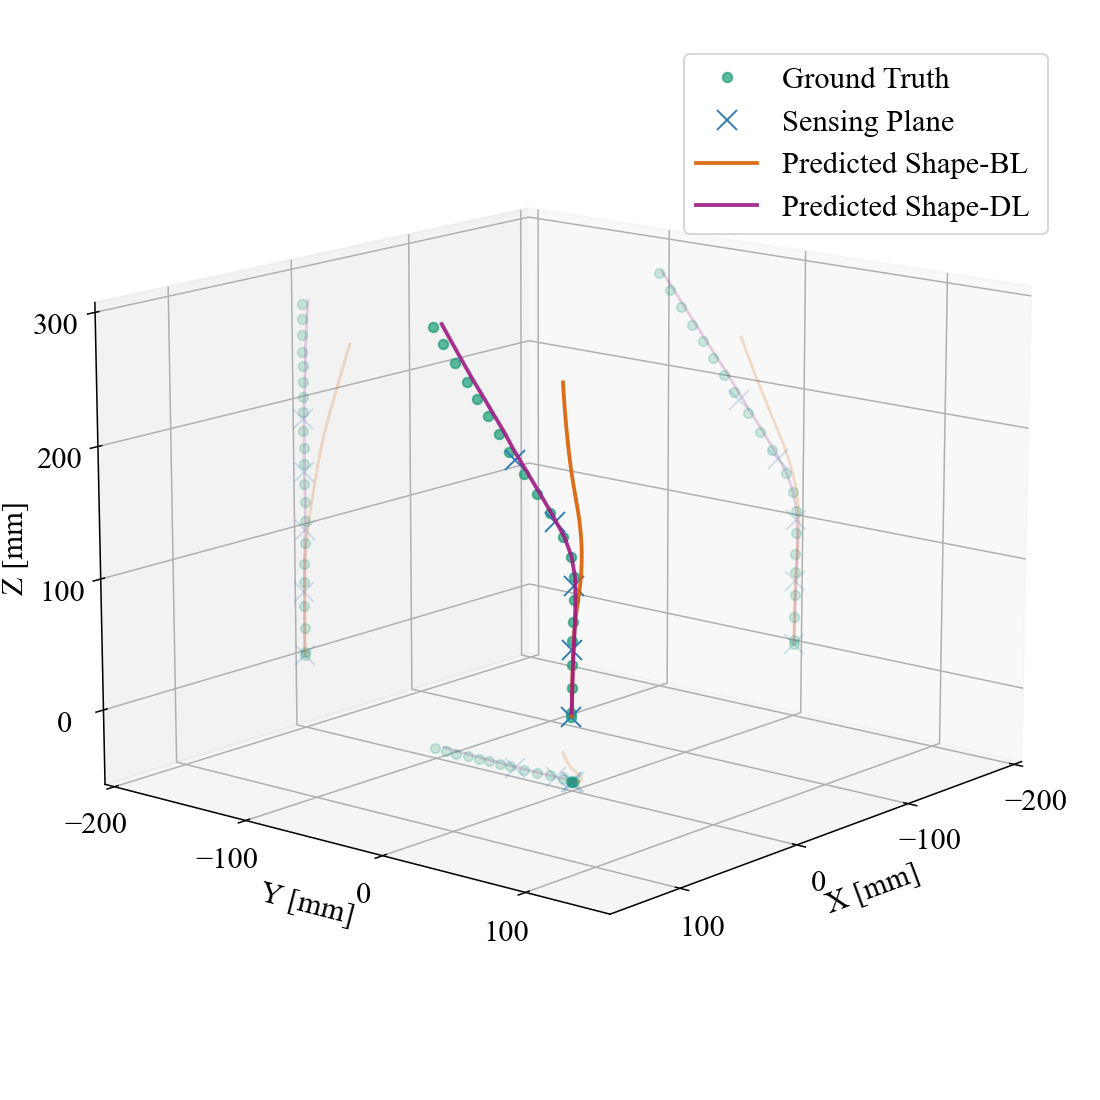

In [7]:
fig = plt.figure(figsize=(8,8))

ax= fig.gca(projection='3d')
# plt.ion()
fig.show()

In [18]:
N1=756
# N1=np.random.randint(len(label_random))

Col=['#1b9e77','#d95f02','#7570b3','#9e1b84','#a6611a','#d01c8b','#2c7bb6']
NN=1
print(N1)
N2=N1+NN
RM=Rotation_Matrix[0:3,0:3]
y_GT=SpatialCoordinate_GT_3min_first_F[:,:,:]
y_pred=SpatialCoordinate_pred_3min_first_F[:,:,:]


for i in range (N1,N2):
#     label_random_Transformed=np.dot(RM,(label_random[i,:].reshape((20,3))[0:16,:]).transpose(1,0))
    pred_Absolute_random_Transformed=np.dot(RM,(pred_Absolute_1[i,:].reshape((20,3))).transpose(1,0))
#     print(pred_Absolute_random_Transformed)
    xyz=y_GT[i,ArcNum_F[0:22],:]
    xyzP=y_pred[i,:,:]#ArcNum_F[0:17]
    FBG=y_GT[i,ArcNum_5FBGs,:]
    ax.clear()
    
#     ax.plot(label_random_Transformed[0,:], label_random_Transformed[1,:], label_random_Transformed[2,:], color=Col[3], linewidth=1 ,marker='o',markersize=3,linestyle='None',alpha=0.7)

    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], color=Col[0], linewidth=1 ,marker='o',markersize=5,linestyle='None',alpha=0.7)
    ax.plot(FBG[:,0], FBG[:,1], FBG[:,2], color=Col[6] ,marker="x", linewidth=1,markersize=10,linestyle='None',alpha=0.99)#matplotlib.markers.CARETDOWN
    ax.plot(xyzP[:,0], xyzP[:,1], xyzP[:,2], color=Col[1], linewidth=2,alpha=0.9)#,marker='o',markersize=5)
    ax.plot(pred_Absolute_random_Transformed[0,:], pred_Absolute_random_Transformed[1,:], pred_Absolute_random_Transformed[2,:], color=Col[3], linewidth=2,alpha=0.9)
    
    null_P = np.zeros(len(xyzP[:,0]))
    null = np.zeros(len(xyz[:,0]))
    null_A = np.zeros(len(pred_Absolute_random_Transformed[0,:]))


    offsetX=-200
    offsetY=-200
    offsetZ=-50
    alpha=0.2
    
    colA=Col[3]
    ax.plot(pred_Absolute_random_Transformed[0,:], pred_Absolute_random_Transformed[1,:],null_A+offsetZ,color=colA,alpha=alpha)
    ax.plot(pred_Absolute_random_Transformed[0,:],null_A+offsetY, pred_Absolute_random_Transformed[2,:],color=colA,alpha=alpha)
    ax.plot(null_A+offsetX,pred_Absolute_random_Transformed[1,:], pred_Absolute_random_Transformed[2,:],color=colA,alpha=alpha)
    
    col=Col[0]
    ax.plot(xyz[:,0], xyz[:,1],null+offsetZ,color=col,linestyle='None',marker='o',alpha=alpha,markersize=5)
    ax.plot(xyz[:,0],null+offsetY, xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=5)
    ax.plot(null+offsetX,xyz[:,1], xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=5)

    colP=Col[1]
    ax.plot(xyzP[:,0], xyzP[:,1],null_P+offsetZ,color=colP,alpha=alpha)
    ax.plot(xyzP[:,0],null_P+offsetY, xyzP[:,2],color=colP,alpha=alpha)
    ax.plot(null_P+offsetX,xyzP[:,1], xyzP[:,2],color=colP,alpha=alpha)

    col=Col[6]
    ax.plot(FBG[:,0], FBG[:,1],np.zeros(len(FBG[:,0]))+offsetZ,color=col,linestyle='None',marker='x',alpha=alpha,markersize=10)
    ax.plot(FBG[:,0],np.zeros(len(FBG[:,0]))+offsetY, FBG[:,2],color=col,linestyle='None',marker='x',alpha=alpha,markersize=10)
    ax.plot(np.zeros(len(FBG[:,0]))+offsetX,FBG[:,1], FBG[:,2],color=col,linestyle='None',marker='x',alpha=alpha,markersize=10)
# |

    ax.axes.set_xlim3d(left=offsetX, right=150) 
    ax.axes.set_ylim3d(bottom=offsetY, top=150) 
    ax.axes.set_zlim3d(bottom=offsetZ, top=300)
    
    ax.locator_params(axis='x', nbins=4)
    ax.locator_params(axis='y', nbins=4)
    ax.locator_params(axis='z', nbins=6)
    
#     ax.axes.set_xlim3d(left=200, right=600) 
#     ax.axes.set_ylim3d(bottom=50, top=500) 
#     ax.axes.set_zlim3d(bottom=-100, top=300)
    ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
    ax.set_ylabel('Y [mm]')
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel('Z [mm]', rotation=90)
    ax.view_init(elev=14., azim=40)
    ax.legend(['Ground Truth','Sensing Plane','Predicted Shape-MFD','Predicted Shape-DL '], loc='best')

#     plt.pause(0.001)
    fig.canvas.draw()
#     plt.tight_layout
    
#     save figure with different names depend on the view
#     filename='ClassicalApproach_TestResults_5_Schade'+str(i)+'.png'
#     plt.savefig(filename, dpi=300)

    plt.grid(b=True, which='both', axis='both', color='0.95')
    plt.tight_layout()
    os.chdir("/evaluation/3DshapeExamples")
    filename = 'example_3min_first_%s.svg' % N1
    plt.savefig(filename,format='svg')

756


<IPython.core.display.Javascript object>


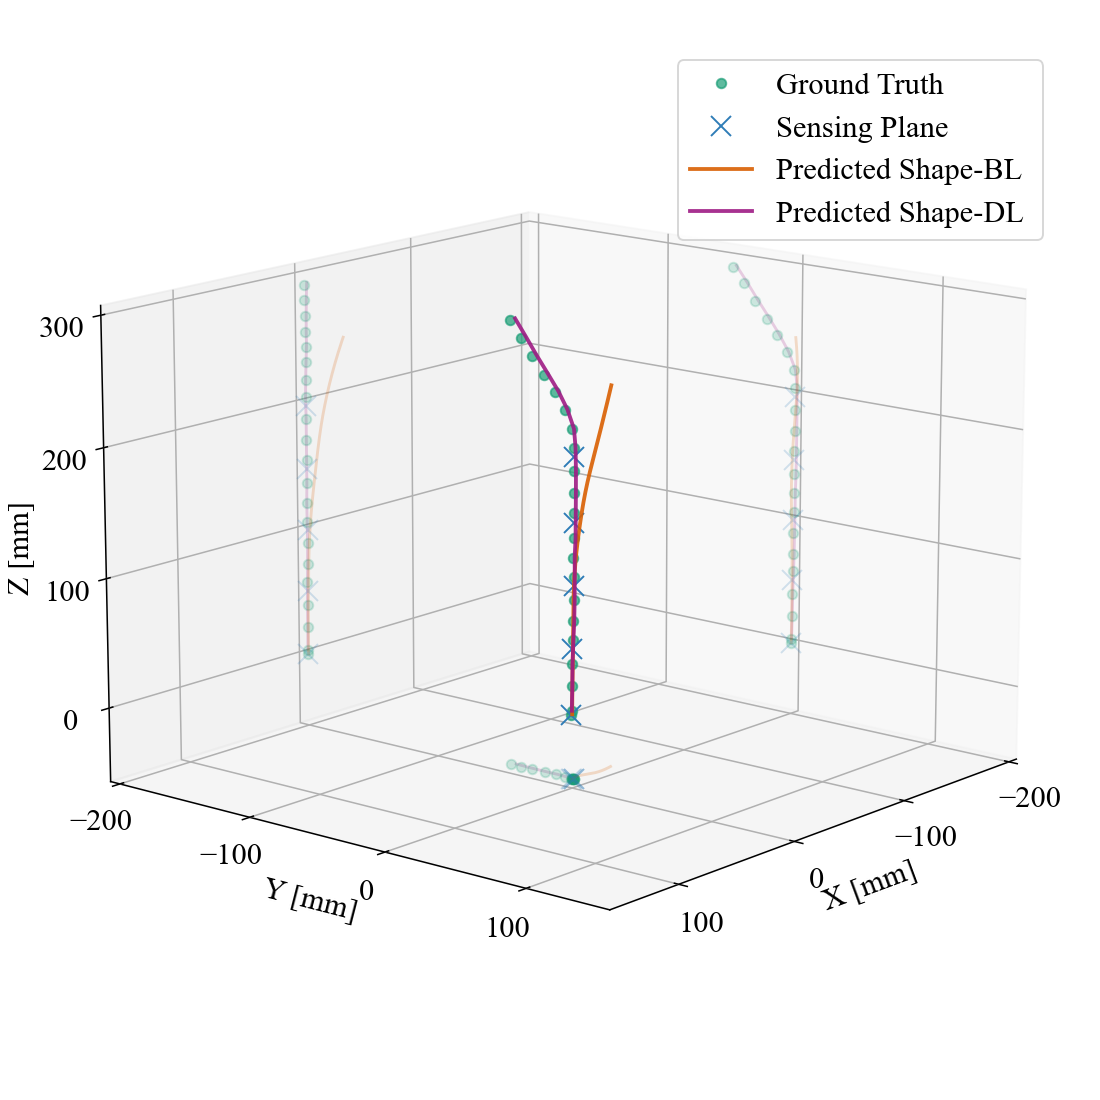

In [23]:
fig = plt.figure(figsize=(8,8))

ax= fig.gca(projection='3d')
plt.ion()
fig.show()


In [24]:
N1=1325 
# N1=np.random.randint(len(label_random))

Col=['#1b9e77','#d95f02','#7570b3','#9e1b84','#a6611a','#d01c8b','#2c7bb6']
NN=1
print(N1)
N2=N1+NN
RM=Rotation_Matrix[0:3,0:3]
y_GT=SpatialCoordinate_GT_3min_first_F[:,:,:]
y_pred=SpatialCoordinate_pred_3min_first_F[:,:,:]


for i in range (N1,N2):
#     label_random_Transformed=np.dot(RM,(label_random[i,:].reshape((20,3))[0:16,:]).transpose(1,0))
    pred_Absolute_random_Transformed=np.dot(RM,(pred_Absolute_1[i,:].reshape((20,3))).transpose(1,0))
#     print(pred_Absolute_random_Transformed)
    xyz=y_GT[i,ArcNum_F[0:22],:]
    xyzP=y_pred[i,:,:]#ArcNum_F[0:17]
    FBG=y_GT[i,ArcNum_5FBGs,:]
    ax.clear()
    
#     ax.plot(label_random_Transformed[0,:], label_random_Transformed[1,:], label_random_Transformed[2,:], color=Col[3], linewidth=1 ,marker='o',markersize=3,linestyle='None',alpha=0.7)

    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], color=Col[0], linewidth=1 ,marker='o',markersize=5,linestyle='None',alpha=0.7)
    ax.plot(FBG[:,0], FBG[:,1], FBG[:,2], color=Col[6] ,marker="x", linewidth=1,markersize=10,linestyle='None',alpha=0.99)#matplotlib.markers.CARETDOWN
    ax.plot(xyzP[:,0], xyzP[:,1], xyzP[:,2], color=Col[1], linewidth=2,alpha=0.9)#,marker='o',markersize=5)
    ax.plot(pred_Absolute_random_Transformed[0,:], pred_Absolute_random_Transformed[1,:], pred_Absolute_random_Transformed[2,:], color=Col[3], linewidth=2,alpha=0.9)
    
    null_P = np.zeros(len(xyzP[:,0]))
    null = np.zeros(len(xyz[:,0]))
    null_A = np.zeros(len(pred_Absolute_random_Transformed[0,:]))


    offsetX=-200
    offsetY=-200
    offsetZ=-50
    alpha=0.2
    
    colA=Col[3]
    ax.plot(pred_Absolute_random_Transformed[0,:], pred_Absolute_random_Transformed[1,:],null_A+offsetZ,color=colA,alpha=alpha)
    ax.plot(pred_Absolute_random_Transformed[0,:],null_A+offsetY, pred_Absolute_random_Transformed[2,:],color=colA,alpha=alpha)
    ax.plot(null_A+offsetX,pred_Absolute_random_Transformed[1,:], pred_Absolute_random_Transformed[2,:],color=colA,alpha=alpha)
    
    col=Col[0]
    ax.plot(xyz[:,0], xyz[:,1],null+offsetZ,color=col,linestyle='None',marker='o',alpha=alpha,markersize=5)
    ax.plot(xyz[:,0],null+offsetY, xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=5)
    ax.plot(null+offsetX,xyz[:,1], xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=5)

    colP=Col[1]
    ax.plot(xyzP[:,0], xyzP[:,1],null_P+offsetZ,color=colP,alpha=alpha)
    ax.plot(xyzP[:,0],null_P+offsetY, xyzP[:,2],color=colP,alpha=alpha)
    ax.plot(null_P+offsetX,xyzP[:,1], xyzP[:,2],color=colP,alpha=alpha)

    col=Col[6]
    ax.plot(FBG[:,0], FBG[:,1],np.zeros(len(FBG[:,0]))+offsetZ,color=col,linestyle='None',marker='x',alpha=alpha,markersize=10)
    ax.plot(FBG[:,0],np.zeros(len(FBG[:,0]))+offsetY, FBG[:,2],color=col,linestyle='None',marker='x',alpha=alpha,markersize=10)
    ax.plot(np.zeros(len(FBG[:,0]))+offsetX,FBG[:,1], FBG[:,2],color=col,linestyle='None',marker='x',alpha=alpha,markersize=10)
# |

    ax.axes.set_xlim3d(left=offsetX, right=150) 
    ax.axes.set_ylim3d(bottom=offsetY, top=150) 
    ax.axes.set_zlim3d(bottom=offsetZ, top=300)
    
    ax.locator_params(axis='x', nbins=4)
    ax.locator_params(axis='y', nbins=4)
    ax.locator_params(axis='z', nbins=6)
    
#     ax.axes.set_xlim3d(left=200, right=600) 
#     ax.axes.set_ylim3d(bottom=50, top=500) 
#     ax.axes.set_zlim3d(bottom=-100, top=300)
    ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
    ax.set_ylabel('Y [mm]')
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel('Z [mm]', rotation=90)
    ax.view_init(elev=14., azim=40)
    ax.legend(['Ground Truth','Sensing Plane','Predicted Shape-MFD','Predicted Shape-DL '], loc='best')

#     plt.pause(0.001)
    fig.canvas.draw()
#     plt.tight_layout
    
#     save figure with different names depend on the view
#     filename='ClassicalApproach_TestResults_5_Schade'+str(i)+'.png'
#     plt.savefig(filename, dpi=300)

    plt.grid(b=True, which='both', axis='both', color='0.95')
    plt.tight_layout()
    os.chdir("/evaluation/3DshapeExamples")
    filename = 'example_3min_first_%s.svg' % N1
    plt.savefig(filename,format='svg')

1325
